In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
from google.colab import drive
drive.mount('/content/gdriv')

Mounted at /content/gdriv


In [3]:
data_path = "/content/gdriv/My Drive/Colab Notebooks/data" 
stock = pd.read_csv(data_path + '/test_stock.csv', encoding='euc-kr')
stock.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,삼성전자,52500,52600,51600,52100,52900,53300,52700,52300,51200,50400,50400,51100,51300,50900,50700,51200,51200,50300,49900,50500,50700,50100,50000,49150,48550,48900,47750,48000,47600,48850,49050,48400,49200,48900,49500,49300,49200,49150,47700,...,43700,43000,43700,43150,42650,43200,43500,43950,44950,45200,45350,46550,46100,47150,47200,46400,47300,47200,46800,46100,46050,46850,46450,46300,46200,45550,45100,44400,45650,46000,45400,46250,46600,47000,46500,45700,45600,45500,45700,45500
1,삼성SDI,234500,233000,234000,237500,232000,232000,235000,233000,231000,227500,230000,228000,229500,226000,226000,224500,224500,224500,224000,220000,218500,220000,226500,227000,232500,226500,219500,218500,220500,225500,223000,222500,224500,223000,238500,237000,237000,236500,234500,...,255500,245500,249500,247500,236000,235500,236000,243000,251500,248500,249000,237000,229000,232000,233000,239000,242500,241500,242000,242000,241000,241000,239000,238000,231000,231500,227500,234000,238500,239000,233000,234500,238000,236500,237500,229000,229000,229500,233000,237500
2,SKC,45200,45400,47150,46050,44100,44700,46000,47100,44750,44350,44150,44250,44800,41100,42000,41600,42050,41700,42150,41900,41750,41200,41700,40600,40250,41000,40800,39400,39700,39900,39800,39350,39500,39850,42500,42250,44050,43200,43650,...,40900,40150,41000,42850,43850,42500,41000,41800,42250,41750,42300,40900,41300,41650,41800,43400,44100,43000,43600,44000,42850,42950,43200,41750,40650,40300,39350,38000,38350,39150,38550,38400,39100,39600,36800,36300,36900,35500,35500,36650
3,현대백화점,78500,75600,76400,77400,78200,78300,75400,75700,73500,73900,74600,75800,76000,76000,76100,77000,77600,78600,79100,76300,77300,75500,76000,75700,74700,76500,75200,75000,75800,77600,78100,76500,77400,78900,78000,78200,79000,78700,78900,...,70100,70500,70000,70900,71100,69300,70400,71100,72900,74100,74100,75300,74800,75800,77000,77700,79400,78700,78700,78000,79300,80400,79300,81300,79600,78800,79000,79400,80900,80800,80700,82100,83200,82700,83400,82600,83800,83700,84100,84800
4,한전KPS,32950,33500,33700,33600,33700,33350,33600,33750,32750,32600,33150,33500,33850,33750,33650,33200,33850,33600,33400,33300,33200,33200,33200,32700,32450,34050,34300,34000,34350,34750,34550,33900,34500,34100,34650,34650,34400,34000,34000,...,30850,30950,31300,30800,30600,30500,30600,30800,31100,31500,31900,31150,31100,31200,31250,31700,31950,31100,31200,30450,30700,30600,30650,31200,31100,30550,30550,31200,32250,31450,31500,31000,31250,31250,31650,31350,31300,32900,32400,33000


In [4]:
name = stock.iloc[:,0]
print(name)

0          삼성전자
1         삼성SDI
2           SKC
3         현대백화점
4         한전KPS
         ...   
195      현대엘리베이
196      대우조선해양
197     일진머티리얼즈
198    포스코인터내셔널
199     BNK금융지주
Name: Unnamed: 0, Length: 200, dtype: object


In [5]:
train = stock.iloc[:,1:].values
train

array([[ 52500,  52600,  51600, ...,  45500,  45700,  45500],
       [234500, 233000, 234000, ..., 229500, 233000, 237500],
       [ 45200,  45400,  47150, ...,  35500,  35500,  36650],
       ...,
       [ 40150,  40550,  41550, ...,  35800,  36400,  36600],
       [ 18850,  19250,  19000, ...,  18050,  18200,  18100],
       [  7130,   7260,   7180, ...,   7390,   7310,   7300]])

In [8]:
# 데이터 scaling
from sklearn.preprocessing import minmax_scale
scaled_train = minmax_scale(train, axis=1, copy=True)
scaled_train

array([[0.92488263, 0.9342723 , 0.84037559, ..., 0.26760563, 0.28638498,
        0.26760563],
       [0.43243243, 0.39189189, 0.41891892, ..., 0.2972973 , 0.39189189,
        0.51351351],
       [0.83261803, 0.84978541, 1.        , ..., 0.        , 0.        ,
        0.09871245],
       ...,
       [0.62566845, 0.6684492 , 0.77540107, ..., 0.16042781, 0.22459893,
        0.2459893 ],
       [0.61818182, 0.76363636, 0.67272727, ..., 0.32727273, 0.38181818,
        0.34545455],
       [0.66666667, 0.78070175, 0.71052632, ..., 0.89473684, 0.8245614 ,
        0.81578947]])

In [17]:
score = []
for i in range(2,30):
  model = KMeans(n_clusters=i)
  res = model.fit(scaled_train)
  score.append(res.score(scaled_train))
print(score)

[-714.6837538552484, -609.5021359324446, -538.5689814168727, -488.30536583488686, -451.8287207492785, -430.456791158487, -410.9806606095366, -396.1642691790848, -382.36063274577765, -368.3198373332658, -362.0380149977403, -352.6766475563875, -335.2882716788368, -333.7354289916775, -322.14427426641464, -320.74138767382345, -310.27498627422835, -306.01021764021255, -296.8573608574999, -290.66385221864243, -288.1951309523382, -278.9673709010812, -276.00002056044866, -271.61693840432986, -262.39463436586374, -261.6914559135929, -256.01802813813373, -251.55126775414885]


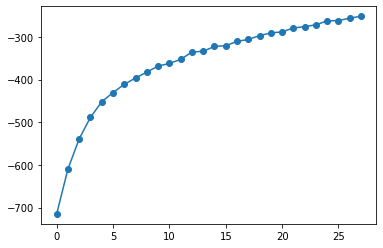

In [18]:
plt.plot(score, marker = 'o')

In [24]:
model = KMeans(n_clusters=6)
# 그래프에서 군집 수 6개와 7개 사이의 score값 증가량이 5개와 6개 사이의 증가량보다 많이 적기 때문에 군집 수를 6개로 정했다

In [25]:
res = model.fit(scaled_train)

In [26]:
res.labels_

array([1, 4, 3, 2, 1, 3, 2, 0, 1, 2, 2, 5, 3, 0, 5, 2, 1, 2, 0, 3, 3, 2,
       2, 0, 2, 4, 5, 5, 2, 1, 2, 2, 4, 0, 3, 0, 0, 1, 4, 0, 0, 0, 1, 5,
       1, 0, 2, 5, 0, 0, 5, 5, 0, 0, 0, 0, 1, 5, 2, 5, 2, 2, 2, 4, 1, 4,
       5, 2, 0, 2, 0, 2, 0, 1, 0, 5, 0, 2, 2, 5, 3, 4, 5, 0, 5, 2, 5, 0,
       5, 5, 0, 5, 0, 5, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 0, 5, 0, 0, 0, 0,
       0, 3, 0, 4, 4, 3, 0, 1, 4, 0, 5, 5, 0, 1, 1, 3, 5, 2, 5, 2, 0, 0,
       2, 1, 3, 2, 1, 0, 1, 2, 0, 2, 0, 3, 5, 2, 0, 0, 5, 5, 4, 5, 5, 1,
       5, 5, 0, 1, 2, 2, 0, 5, 0, 2, 0, 4, 3, 0, 4, 2, 5, 0, 5, 0, 4, 1,
       2, 3, 2, 1, 5, 0, 0, 0, 2, 5, 5, 5, 2, 1, 0, 4, 5, 5, 5, 2, 2, 4,
       2, 2], dtype=int32)

In [27]:
cluster_res = pd.concat([name,pd.DataFrame(res.labels_)],axis=1)
cluster_res.columns = ['name','cluster']
cluster_res

,name,cluster
0,삼성전자,1
1,삼성SDI,4
2,SKC,3
3,현대백화점,2
4,한전KPS,1
...,...,...
195,현대엘리베이,2
196,대우조선해양,2
197,일진머티리얼즈,4
198,포스코인터내셔널,2


In [32]:
cluster_dt = pd.concat([cluster_res,pd.DataFrame(scaled_train)],axis=1)
print(cluster_dt)

         name  cluster         0  ...        97        98        99
0        삼성전자        1  0.924883  ...  0.267606  0.286385  0.267606
1       삼성SDI        4  0.432432  ...  0.297297  0.391892  0.513514
2         SKC        3  0.832618  ...  0.000000  0.000000  0.098712
3       현대백화점        2  0.608696  ...  0.931677  0.956522  1.000000
4       한전KPS        1  0.581395  ...  0.569767  0.453488  0.593023
..        ...      ...       ...  ...       ...       ...       ...
195    현대엘리베이        2  0.244147  ...  0.862876  0.742475  0.775920
196    대우조선해양        2  0.524862  ...  0.955801  1.000000  0.911602
197   일진머티리얼즈        4  0.625668  ...  0.160428  0.224599  0.245989
198  포스코인터내셔널        2  0.618182  ...  0.327273  0.381818  0.345455
199   BNK금융지주        2  0.666667  ...  0.894737  0.824561  0.815789

[200 rows x 102 columns]


In [35]:
for i in range(0,6):
  print(cluster_dt.loc[cluster_dt['cluster']==i,:])

          name  cluster         0  ...        97        98        99
7           한샘        0  0.277108  ...  0.963855  0.993976  1.000000
13         KCC        0  0.283871  ...  0.948387  0.954839  0.896774
18         이노션        0  0.392157  ...  0.911765  1.000000  1.000000
23       SK텔레콤        0  0.338710  ...  0.919355  0.983871  0.935484
33        한국콜마        0  0.289308  ...  0.949686  0.962264  1.000000
35          영풍        0  0.269231  ...  0.928571  0.923077  0.879121
36   한국테크놀로지그룹        0  0.134146  ...  0.939024  0.890244  0.926829
39         OCI        0  0.026393  ...  0.926686  0.909091  0.938416
40        코스맥스        0  0.272947  ...  0.963768  0.903382  0.951691
41      롯데정밀화학        0  0.356000  ...  0.840000  0.888000  0.896000
45       POSCO        0  0.360825  ...  0.845361  0.824742  0.793814
48        태광산업        0  0.323383  ...  0.902985  0.870647  0.900498
49       현대홈쇼핑        0  0.096774  ...  0.861751  0.930876  0.815668
52      현대그린푸드        0  0.215686 

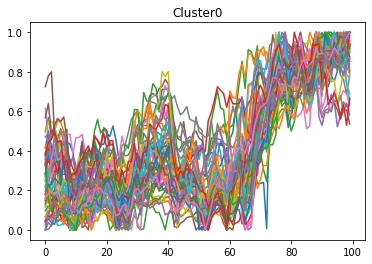

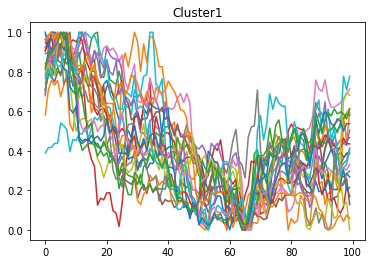

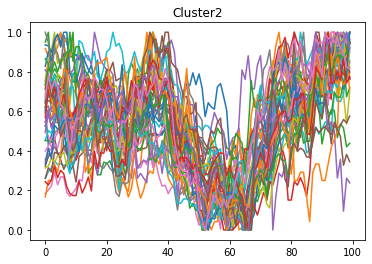

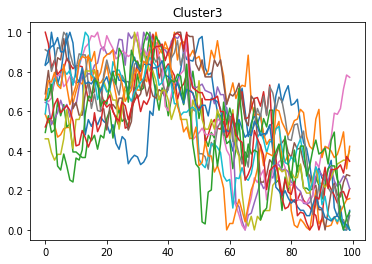

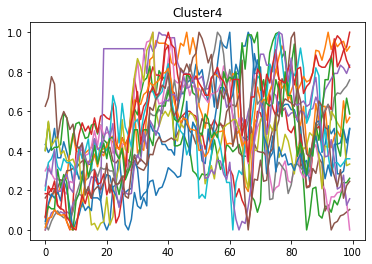

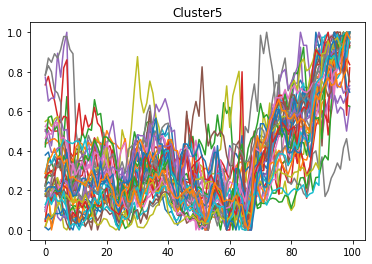

In [36]:
for k in range(6): # k는 군집수
  cluster0 = cluster_dt.loc[cluster_dt['cluster']==k,:]
  cluster = cluster0.iloc[:,2:].reset_index(drop=True)
  for i in range(len(cluster)):
    plt.plot(cluster.iloc[i,:])
  plt.title('Cluster' + str(k))
  plt.show()